<a href="https://colab.research.google.com/github/Mohamed-Ashif/MLForCloudDeployment_Heroku/blob/main/Predicting_Chance_of_Admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graduate Admission Prediction** 
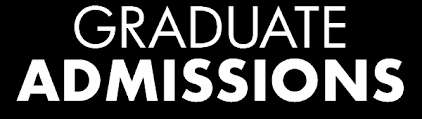

# About the dataset

The dataset contains several parameters.
The parameters included are :

1. GRE Scores ( out of 340 )

2. TOEFL Scores ( out of 120 )

3. University Rating ( out of 5 )

4. Statement of Purpose ( out of 5 )

5. Letter of Recommendation Strength ( out of 5 )

6. Undergraduate CGPA ( out of 10 )

7. Research Experience ( either 0 or 1 )

8. Chance of Admit ( ranging from 0 to 1 )

In [ ]:
# Installing the necessary module

!pip install pickle-mixin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=6008 sha256=fb59d1856dee43bc6103e860e29fe3a9702b68d4eec673c253b45d1ba2ddc5e7
  Stored in directory: /root/.cache/pip/wheels/d0/70/0b/673e09a7ed429660d22352a1b117b4f616a8fc054bdd7eb157
Successfully built pickle-mixin


In [ ]:
# Importing the necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle
%matplotlib inline

In [ ]:
# Importing the dataset

from google.colab import files
uploaded_files = files.upload()

Saving Admission_Predict.csv to Admission_Predict.csv


In [ ]:
# Reading the dataset and displaying the first five rows

df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Displaying the basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
# Displaying datatypes of each column
 
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [ ]:
# Displaying the statistical information about the data

df.describe(include = 'all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
# Displaying the shape of the dataset (rows, columns)

df.shape

(500, 9)

In [ ]:
# Checking whether the data has any null values

df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# Displaying the column names in the dataset

df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
# Dropping unnecessary column in the dataset

df = df.drop("Serial No.", axis="columns")
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

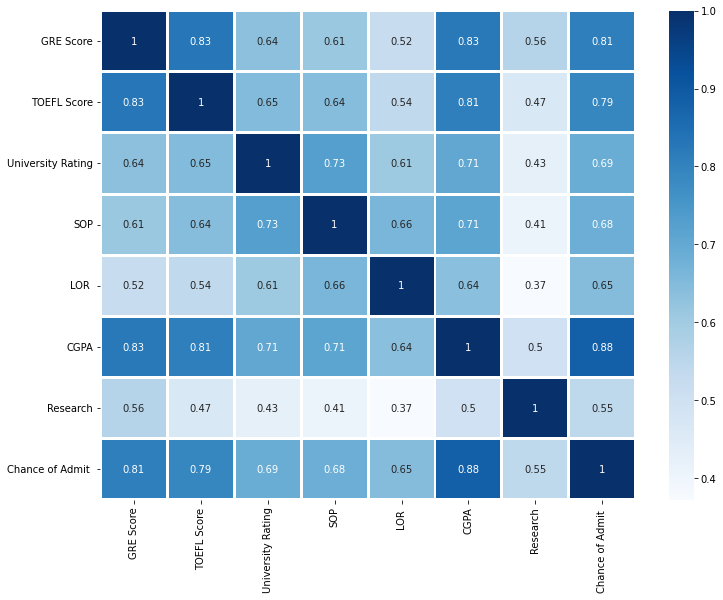

In [ ]:
# Creating heatmap to view the data in the form of colored maps

plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot = True, cmap='Blues', linewidths=2)
plt.show()

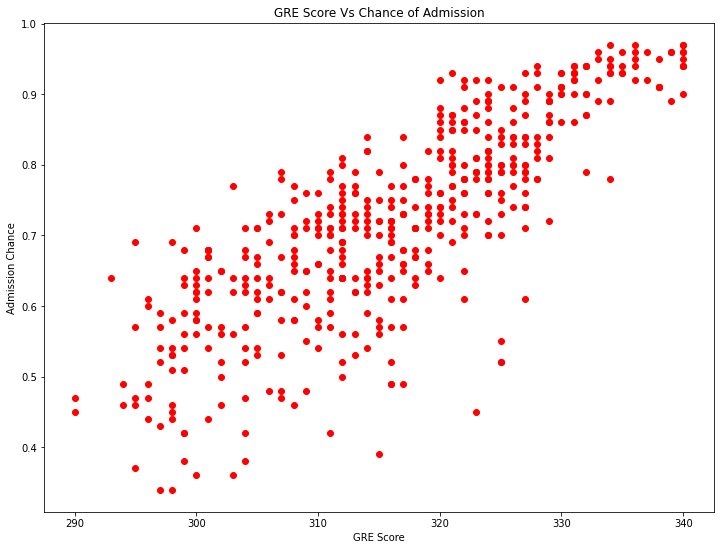

In [ ]:
# A graph to show the relationship between GRE Score and Chance of Admission

plt.figure(figsize=(12,9))
plt.scatter(df['GRE Score'], df['Chance of Admit '], color='red')
plt.title('GRE Score Vs Chance of Admission')
plt.xlabel('GRE Score')
plt.ylabel('Admission Chance')
plt.show()

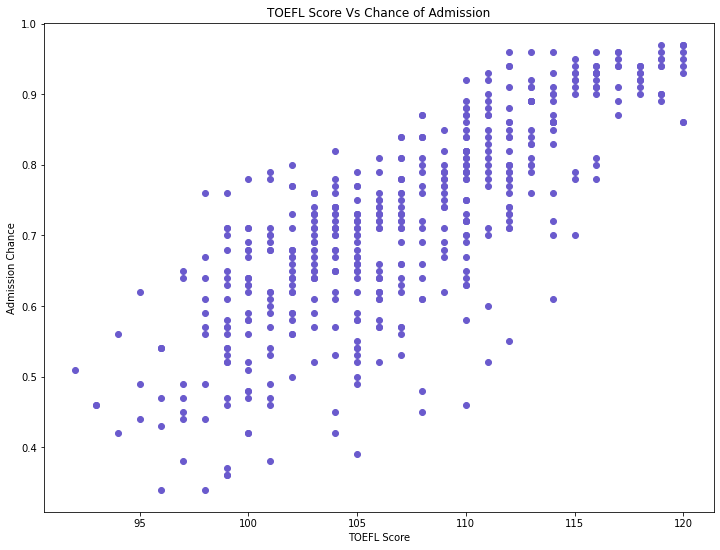

In [ ]:
# A graph to show the relationship between TOEFL Score and Chance of Admission

plt.figure(figsize=(12,9))
plt.scatter(df['TOEFL Score'], df['Chance of Admit '], color='SlateBlue')
plt.title('TOEFL Score Vs Chance of Admission')
plt.xlabel('TOEFL Score')
plt.ylabel('Admission Chance')
plt.show()

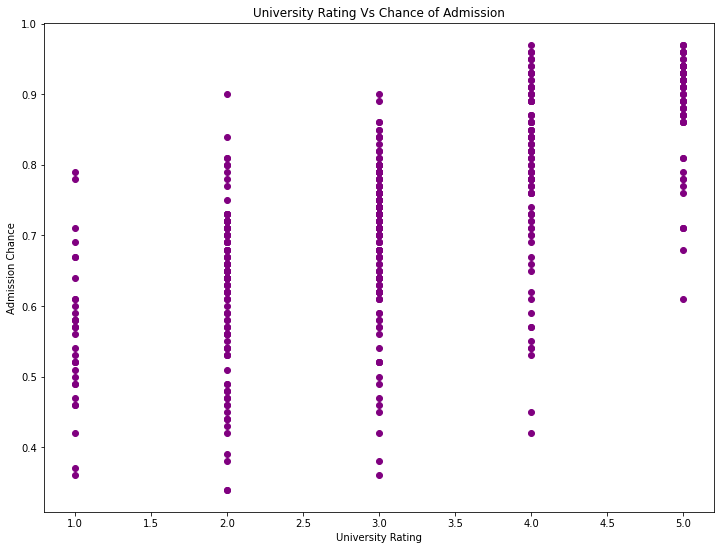

In [ ]:
# A graph to show the relationship between University Rating and Chance of Admission

plt.figure(figsize=(12,9))
plt.scatter(df['University Rating'], df['Chance of Admit '], color='Purple')
plt.title('University Rating Vs Chance of Admission')
plt.xlabel('University Rating')
plt.ylabel('Admission Chance')
plt.show()

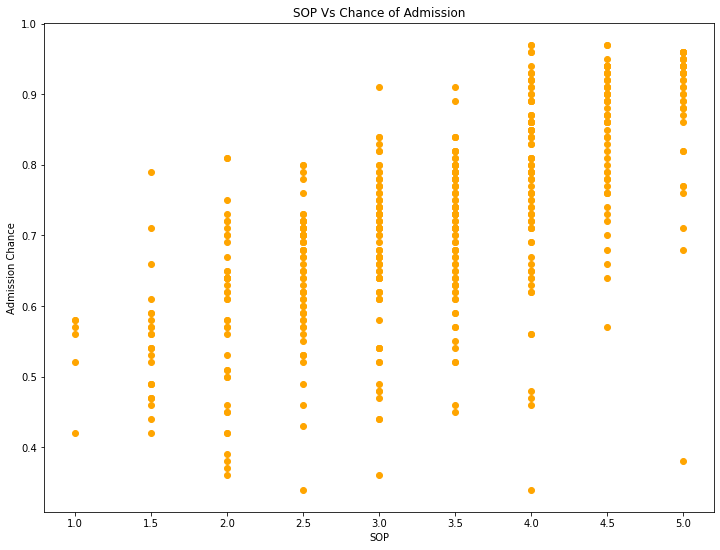

In [ ]:
# A graph to show the relationship between Statement of Purpose and Chance of Admission

plt.figure(figsize=(12,9))
plt.scatter(df['SOP'], df['Chance of Admit '], color='Orange')
plt.title('SOP Vs Chance of Admission')
plt.xlabel('SOP')
plt.ylabel('Admission Chance')
plt.show()

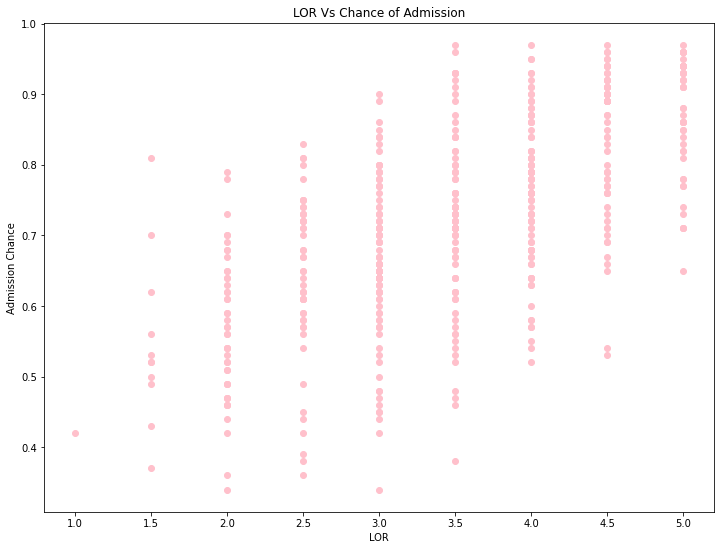

In [ ]:
# A graph to show the relationship between Letter of Recommendation Strength and Chance of Admission

plt.figure(figsize=(12,9))
plt.scatter(df['LOR '], df['Chance of Admit '], color='Pink')
plt.title('LOR Vs Chance of Admission')
plt.xlabel('LOR')
plt.ylabel('Admission Chance')
plt.show()

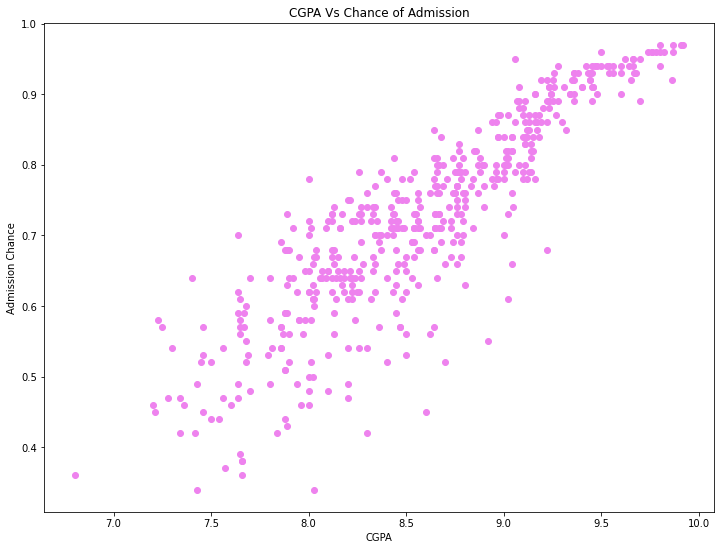

In [ ]:
# A graph to show the relationship between CGPA and Chance of Admission

plt.figure(figsize=(12,9))
plt.scatter(df['CGPA'], df['Chance of Admit '], color='Violet')
plt.title('CGPA Vs Chance of Admission')
plt.xlabel('CGPA')
plt.ylabel('Admission Chance')
plt.show()

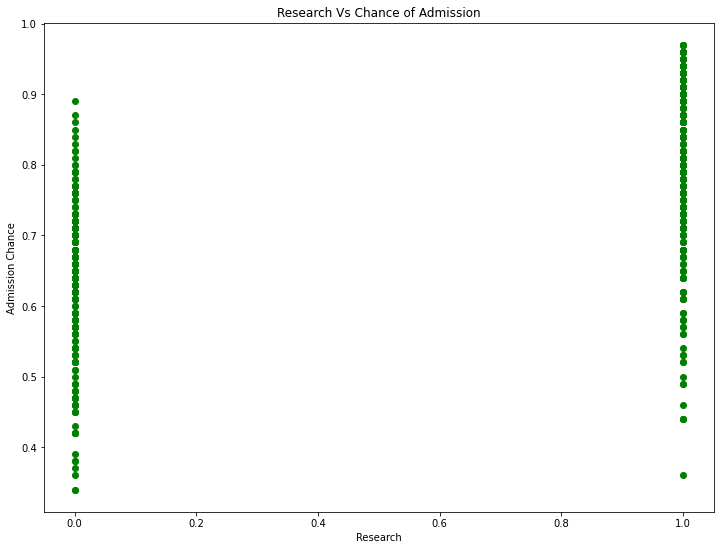

In [ ]:
# A graph to show the relationship between Research Experience and Chance of Admission

plt.figure(figsize=(12,9))
plt.scatter(df['Research'], df['Chance of Admit '], color='Green')
plt.title('Research Vs Chance of Admission')
plt.xlabel('Research')
plt.ylabel('Admission Chance')
plt.show()

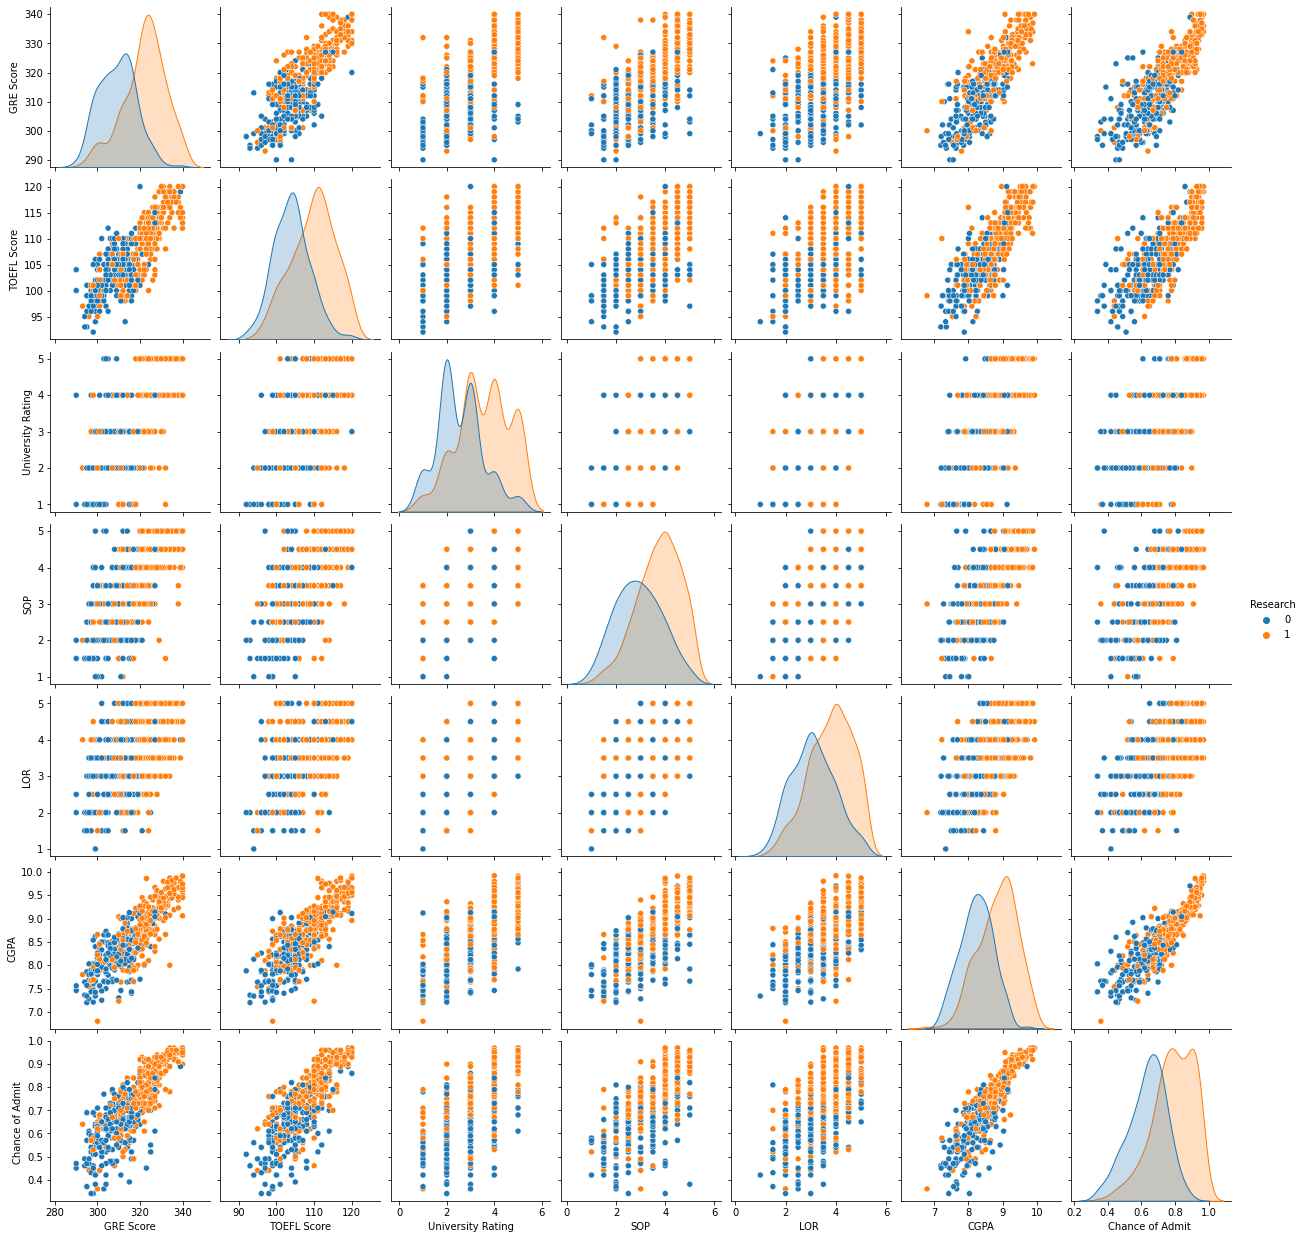

In [ ]:
# For ploting pairwise relationships in a dataset

sns.pairplot(df, hue='Research')
plt.show()

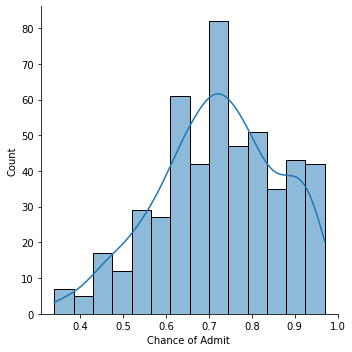

In [ ]:
# Distribution plot represents the overall distribution of continuous data variable

sns.displot(df['Chance of Admit '], kde=True)
plt.show()

In [ ]:
# Creating separate training and test data sets

X = df.iloc[:, :7]

Y = df.iloc[:, -1]

In [ ]:
# Splitting the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=100)

# Building a Multiple Linear Regression Model

In [ ]:
# Fitting the data to the  model

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

array([0.85857792, 0.47283398, 0.62905364, 0.44794874, 0.64771227,
       0.8542684 , 0.58692212, 0.67069031, 0.81349242, 0.68381324,
       0.66322177, 0.60687529, 0.8940979 , 0.75955717, 0.63707529,
       0.50344952, 0.59458249, 0.74500883, 0.56050407, 0.703104  ,
       0.8971511 , 0.61098922, 0.85113004, 0.82304196, 0.99762386,
       0.60379326, 0.68216535, 0.93548579, 0.87704376, 0.69936536,
       0.78798117, 0.85332203, 0.74890139, 0.5543006 , 0.73975592,
       0.78167065, 0.79628151, 0.5775695 , 0.54173516, 0.7019866 ,
       0.94763834, 0.5879221 , 0.84029075, 0.78550363, 0.81119215,
       0.548341  , 0.59848251, 0.87409301, 0.95062133, 0.59973034,
       0.81629911, 0.70856204, 0.80651344, 0.98958496, 0.64577186,
       0.85481339, 0.61918346, 0.89705853, 0.7690375 , 0.7331785 ,
       0.68866808, 0.62436384, 0.47814132, 0.88355406, 0.64884425,
       0.68493974, 0.70417791, 0.46117654, 0.84019002, 0.84339131,
       0.92749723, 0.77475045, 0.6551048 , 0.83844526, 0.64615

In [ ]:
# Calculating the accuracy of the model

print("R2 Score:", r2_score(Y_test, Y_pred))

R2 Score: 0.8269826875624783


In [ ]:
# Saving the model to the local file system

filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# prediction using the saved model

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print("Accuracy:", result)

Accuracy: 0.8269826875624783
